#EDGAR Index Notebook that produces time series graph for any forms. 

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.dpi"] = 360
import os
import numpy as np
import warnings
import datetime
warnings.filterwarnings('ignore')


In [2]:
form_list=['S-1','S-3','S-4','F-1','F-3','F-4','D','C', '1-A']

In [3]:
#Pulls data from the idx master file.
os.chdir('J:/Oea/bresler/David/Index')

# Years can go back all the way to 1993.
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
quarters = [1,2,3,4]
dfmerge = pd.DataFrame()
for years in years:
    for quarter in quarters:
        frame = pd.read_csv('Q' + str(quarter) + '_' + str(years) +'.idx',error_bad_lines = False, sep = '|',  encoding='latin-1')
        frame['Company Name'] = frame['Company Name'].replace({',':'', '\.':'', '"':''}, regex=True)
        dfmerge = dfmerge.append(frame, ignore_index=True) 
        dfmerge['Company Name'] = dfmerge['Company Name'].astype(str)
        dfmerge['Company Name'] = dfmerge['Company Name'].map(lambda x: x.strip())
        dfmerge['CIK'] = dfmerge['CIK'].astype(str)
        dfmerge['CIK'] = dfmerge['CIK'].map(lambda x: x.strip())
        dfmerge = dfmerge[(dfmerge['Company Name'] != 'blank')]
        dfmerge['CIK'] = dfmerge['CIK'].map(lambda x: x.lstrip('0'))
        dfmerge['CIK'] = dfmerge['CIK'].astype(int)
        dfmerge['Date Filed'] = dfmerge['Date Filed'].astype(str)
        dfmerge['Date Filed'] = dfmerge['Date Filed'].map(lambda x: x.strip())
        dfmerge['Filename'] = dfmerge['Filename'].astype(str)
        dfmerge['Filename'] = dfmerge['Filename'].map(lambda x: x.lstrip('edgar/data/'))
        dfmerge['Filename'] = dfmerge['Filename'].map(lambda x: x.rstrip('.txt'))
        dfmerge['Filename'] = dfmerge['Filename'].str.replace(r'^[\d]*\/', '')

In [4]:
dfmerge

,CIK,Company Name,Form Type,Date Filed,Filename
0,1000032,BINCH JAMES G,4,2010-03-02,0001181431-10-013095
1,1000045,NICHOLAS FINANCIAL INC,10-Q/A,2010-03-23,0001193125-10-064525
2,1000045,NICHOLAS FINANCIAL INC,10-Q,2010-02-16,0001193125-10-031666
3,1000045,NICHOLAS FINANCIAL INC,8-K,2010-01-12,0001193125-10-005109
4,1000045,NICHOLAS FINANCIAL INC,8-K,2010-02-02,0001193125-10-019005
5,1000045,NICHOLAS FINANCIAL INC,CORRESP,2010-02-12,0001193125-10-030782
6,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2010-02-08,0000950123-10-009863
7,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2010-02-16,0000950123-10-013291
8,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2010-02-16,0000950123-10-013348
9,1000045,NICHOLAS FINANCIAL INC,UPLOAD,2010-01-29,0000000000-10-005950


In [5]:
dfmerge['Date Filed'] = pd.to_datetime(dfmerge['Date Filed'])

In [6]:
df_filtered=dfmerge[dfmerge['Form Type'].isin(form_list)]

In [7]:
grouped_counts = df_filtered.groupby(['Form Type', 'Date Filed'])['Form Type'].value_counts().reset_index(name= 'Counts')

In [8]:
dfyear = grouped_counts

In [9]:
dfyear['year'] = pd.DatetimeIndex(dfyear['Date Filed']).year
dfyear['month'] = pd.DatetimeIndex(grouped_counts['Date Filed']).month

In [10]:
dfyear

,Form Type,Date Filed,level_2,Counts,year,month
0,1-A,2010-02-23,1-A,1,2010,2
1,1-A,2010-03-01,1-A,1,2010,3
2,1-A,2010-03-10,1-A,1,2010,3
3,1-A,2010-03-11,1-A,1,2010,3
4,1-A,2010-03-17,1-A,1,2010,3
5,1-A,2010-04-28,1-A,2,2010,4
6,1-A,2010-05-19,1-A,1,2010,5
7,1-A,2010-05-28,1-A,1,2010,5
8,1-A,2010-06-14,1-A,1,2010,6
9,1-A,2010-06-16,1-A,1,2010,6


In [11]:
dfyear = dfyear.groupby(['year', 'Form Type'])['Counts'].agg([sum]).unstack()

In [12]:
dfyear

sum                                             
Form Type  1-A    C      D  F-1  F-3  F-4   S-1   S-3   S-4
year                                                       
2010        25  NaN  17861   95  134  177  1359  1269  5316
2011        20  NaN  18348   65   87  465  1472  1243  6930
2012        19  NaN  18419   58  156  414  1115  1105  4137
2013        28  NaN  20157   65  100   75  1119  1287  6745
2014        55  NaN  22453  113  214   36  1297  1222  4964
2015        67  NaN  23462   79  536   44   860  1254  4405
2016       145  192  23365   45   62   40   715  1079  2943
2017       125  524  24874   80  225   33   792  1179  3017
2018       144  763  27685  113  252   51   802   838  1629

In [13]:
# This block is needed for formatting purposes. Remove this if using other forms.
dfyear.T.reset_index(drop=True).T
dfyear.columns = ['1-A', 'C', 'D', 'F-1', 'F-3', 'F-4', 'S-1', 'S-3', 'S-4']

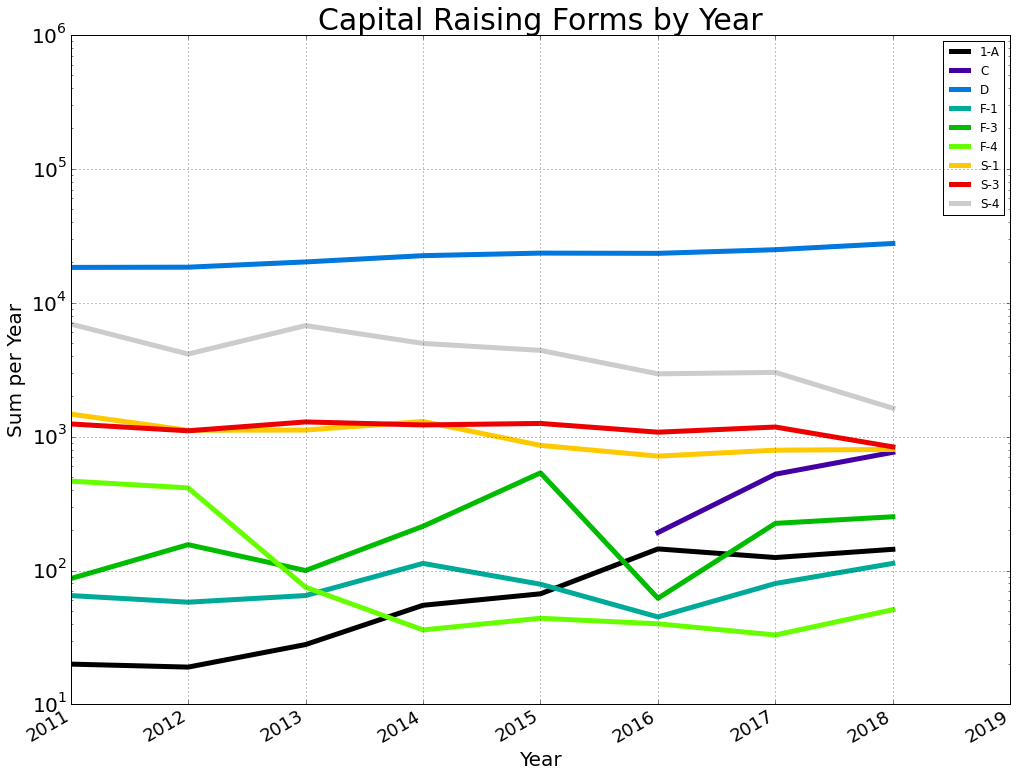

In [14]:
fig, ax = plt.subplots(figsize=(14,12))
dfyear.plot(ax=ax, logy =True, colormap = 'spectral', linewidth=5, fontsize=20)
#Remove x tick labels if using other years
x_ticks_labels = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

plt.tight_layout()
plt.axis('equal')
plt.title('Capital Raising Forms by Year', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sum per Year', fontsize = 20);
fig.autofmt_xdate()

ax.set_ylim([10.0, 1000000.0])
ax.set_xlim([2011.0, 2019.0])
plt.show();